In [1]:
import matplotlib.pyplot as plt
%matplotlib widget

import numpy as np
import os
import sys
from fluxpipe.helpers.pipe_helper import configurations
import pandas as pd

from fluxpipe.science.tempest import plot_tempest, load_tempest, main as tempest_main, write_interpolated_file, reinterpolate_velocity, plot_reinterpolated_velocity



In [2]:
def parse_args():
    # Create the argument parser
    configs = configurations()
    import argparse
    parser = argparse.ArgumentParser(description=
                            'This script plots the expansion factor of the given radial_bmag_all.dat')
    parser.add_argument('--cr',     type=int, default=configs['rotations'][0],    help='Carrington Rotation')
    parser.add_argument('--dat_dir',type=str, default=configs["data_dir"],        help='data directory')
    parser.add_argument('--batch',  type=str, default=configs["batch_name"],      help='select the batch name')
    parser.add_argument('--nwant',  type=int, default=configs["fluxon_count"][0], help='magnetogram file')
    parser.add_argument('--show',   type=int, default=0)
    parser.add_argument('--file',   type=str, default=None)
    parser.add_argument('--adapt',  type=int, default=configs["adapt"],           help='Use ADAPT magnetograms')
    args = parser.parse_args()
    filename = f'{args.dat_dir}/batches/{args.batch}/data/cr{args.cr}/wind/cr{args.cr}_f{args.nwant}_radial_bmag_all.dat'
    configs = configurations(args=args)
    return filename, configs

In [3]:
filename, configs = parse_args()

# print(filename)
tempest_file = filename.replace("all.dat", "tempest.dat")

print(f"Reading {filename}")
print(f"Writing {tempest_file}")


Reading /Users/cgilbert/vscode/fluxons/fluxon-data/batches/tempest/data/cr2200/wind/cr2200_f1000_radial_bmag_all.dat
Writing /Users/cgilbert/vscode/fluxons/fluxon-data/batches/tempest/data/cr2200/wind/cr2200_f1000_radial_bmag_tempest.dat



	Making Tempest File in Python.


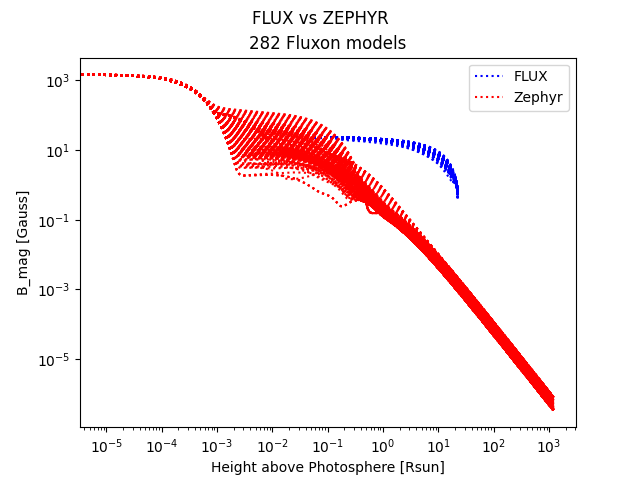

In [4]:

write_interpolated_file(filename, tempest_file)


Is there something different between ZEPHYR and FLUX magnetic field calculations? (yes)

Possibilities:
Flux is wrong
Flux is not in its element
Flux is returning something in a non-standard unit

Expand the FLUX sim out to 1 AU and see what happens to the fields

In [5]:
redo_tempest = True
if redo_tempest:
    tempest_main(tempest_file)

(282, 200)
invalid value encountered in sqrt, set to 0
invalid value encountered in sqrt, set to 0
invalid value encountered in sqrt, set to 0
range of slopes: 1.165674649338154e-06 7.660741077552078e-05
range of slopes: 2.4321299865453228e-05 7.800645880548674e-05
0 , # iterations: 10 , conv: 4.3466962067086756e-05
1 , # iterations: 10 , conv: 4.358949731848259e-05
2 , # iterations: 10 , conv: 4.3283539511587354e-05
3 , # iterations: 10 , conv: 0.0007897183181863752
4 , # iterations: 10 , conv: 4.342172978636e-05
5 , # iterations: 10 , conv: 4.35295860247876e-05
6 , # iterations: 10 , conv: 4.3529467974677824e-05
7 , # iterations: 10 , conv: 4.439633739657794e-05
8 , # iterations: 10 , conv: 0.0008106733049269202
9 , # iterations: 10 , conv: 0.0008088282462804996
10 , # iterations: 10 , conv: 0.0008174743892902103
11 , # iterations: 10 , conv: 0.0007956275888165582
12 , # iterations: 10 , conv: 4.351527050898261e-05
13 , # iterations: 10 , conv: 0.0008582486563770652
14 , # iterations

In [6]:
# _=plot_tempest(tempest_file)



In [7]:
# write_uninterpolated_file(tempest_file)
# zx, zTR, zcrit, u_miranda, u_prospero, rho = load_tempest(tempest_file)

In [8]:
reinterpolate_velocity(tempest_file, filename)

,fnum,radius,velocity
0,0,1.192037,81.148870
1,0,1.679586,117.129796
2,0,2.354856,159.152546
3,0,3.207030,199.432643
4,0,4.218910,239.535841
...,...,...,...
5032,281,16.240714,543.443745
5033,281,17.997748,590.970322
5034,281,19.786961,644.658211
5035,281,21.593543,720.454290


In [16]:
plot_reinterpolated_velocity(filename)



FileNotFoundError: [Errno 2] No such file or directory: '/Users/cgilbert/vscode/fluxons/fluxon-data/batches/tempest/data/cr2200/wind/cr2200_f1000_radial_bmag_tempest_reinterpolated.dat'

In [10]:
directory = os.path.dirname(filename)

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import os

def plot_full_velocity_profiles(directory):
    pattern = "full_velocity_profiles/results_*_full_velocity.dat"
    print(directory)
    file_pattern = os.path.join(directory, pattern )
    filenames = glob.glob(file_pattern)

    if not filenames:
        print(f"No files found in {directory} matching pattern {pattern}")
        return

    plt.figure(figsize=(10, 6))

    for id, filename in enumerate(filenames):
        color = f"C{id}"
        df = pd.read_csv(filename)
        method_name = os.path.basename(filename).split('_')[1]  # Extract method name from filename
        first = True
        for fluxon_id, group in df.groupby('fluxon_position'):
            plt.plot(group['radius'], group['velocity'],
                     label=method_name if first else "",
                     color=color,
                     ls=":")
            first = False


    import re

    # Use regular expression to find the integer value following 'cr'
    match = re.search(r'/cr(\d+)/', directory)
    cr_value = int(match.group(1))

    plt.xlabel('Radius')
    plt.ylabel('Velocity')
    plt.xscale('log')
    # plt.yscale('log')
    plt.legend()
    plt.title(f'Full Velocity Profiles Comparison CR {cr_value}')
    plt.show()

/Users/cgilbert/vscode/fluxons/fluxon-data/batches/tempest/data/cr2200/wind


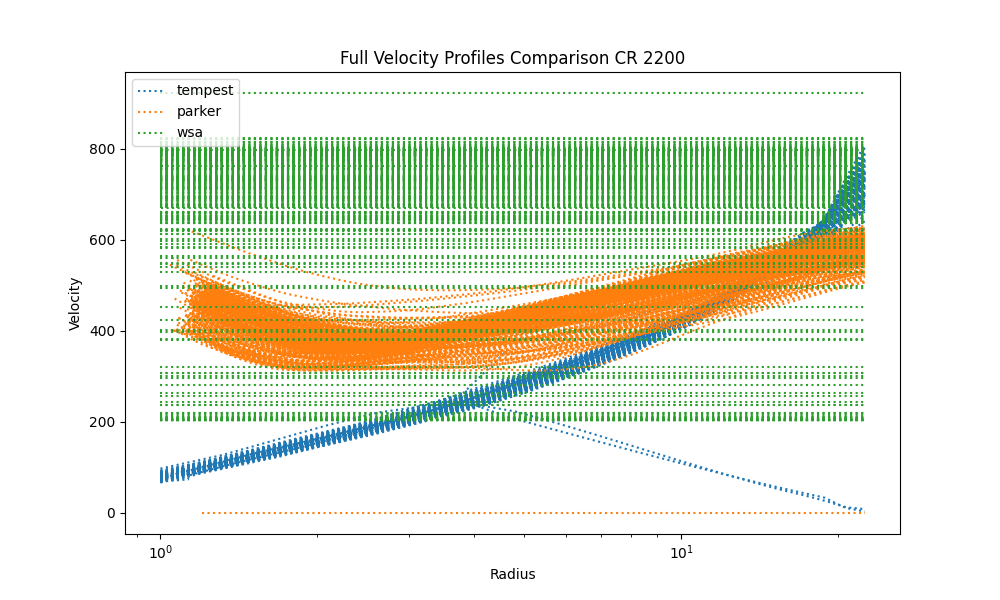

In [26]:
plot_full_velocity_profiles(directory)